In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns',999)

Data Exploration

In [ ]:
df = pd.read_excel("C:/Users/Githma Manthinie/Downloads/project1/data/online_retail_II.xlsx", sheet_name=0)


df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [9]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [10]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [11]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [14]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
df["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [17]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [22]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")== False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [23]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Data Clean

In [25]:
cleaned_df = df.copy()

In [27]:
cleaned_df["Invoice"] = cleaned_df["Invoice"]


In [29]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df =cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [33]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    |(cleaned_df["StockCode"].str.match("^\\d{6}[a-zA-Z]$") == True)
    |(cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [37]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)


C:\Users\Githma Manthinie\AppData\Local\Temp\ipykernel_10168\1149358903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [38]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350943.00,350943,350943.00,350943.00
mean,13.70,2010-07-05 17:09:34.748549120,2.98,15360.24
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.07,NaN,4.42,1678.20


In [41]:
len(cleaned_df[cleaned_df["Price"] == 0])

27

In [42]:
cleaned_df= cleaned_df[cleaned_df["Price"] > 0]

In [43]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.00,350916,350916.00,350916.00
mean,13.70,2010-07-05 17:14:15.798311168,2.98,15360.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.08,NaN,4.42,1678.16


In [44]:
cleaned_df["Price"].min()

np.float64(0.001)

In [45]:
len(cleaned_df)/len(df)

0.667825014606222

dropped about 33% of original data

Feature Engineering

In [46]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

C:\Users\Githma Manthinie\AppData\Local\Temp\ipykernel_10168\3407437207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [53]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue = ("SalesLineTotal" ,"sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate =("InvoiceDate", "max")
    ) 
aggregated_df.head(10)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,144.02,2,2010-06-28 13:53:00
1,12347.00,966.87,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,1946.64,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
5,12352.00,332.40,2,2010-11-29 10:07:00
6,12353.00,317.76,1,2010-10-27 12:44:00
7,12355.00,329.41,1,2010-05-21 11:59:00
8,12356.00,2092.58,3,2010-11-24 12:24:00
9,12357.00,10468.27,1,2010-11-16 10:05:00


In [56]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,144.02,2,2010-06-28 13:53:00,164
1,12347.00,966.87,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,1946.64,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


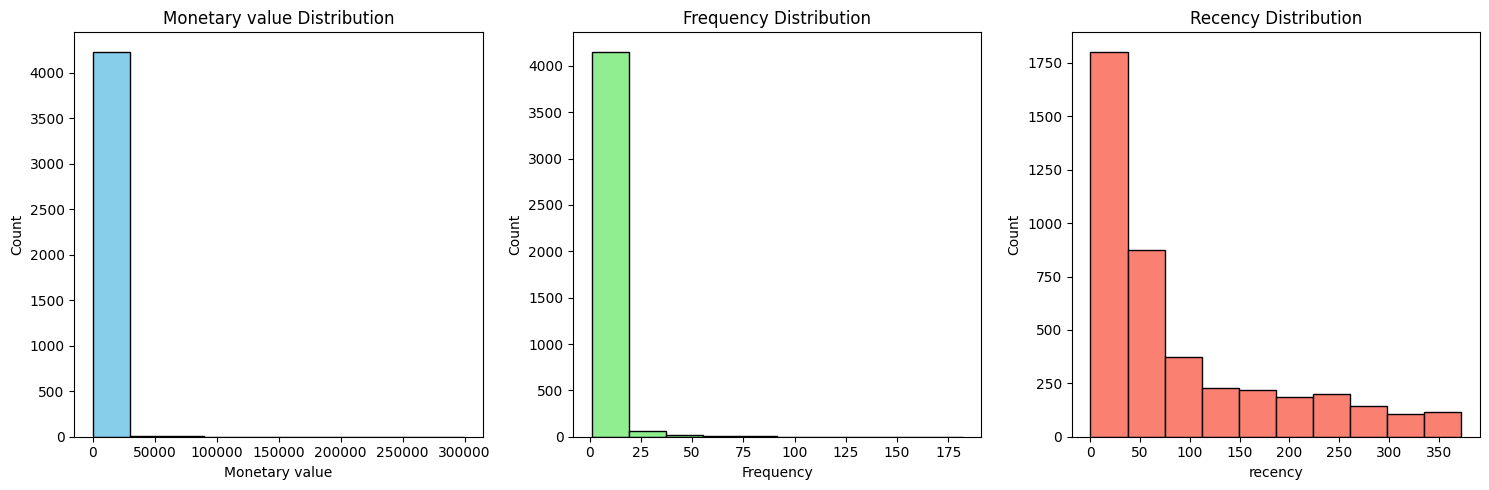

In [59]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor ='black')
plt.title('Monetary value Distribution')
plt.xlabel('Monetary value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor ='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor ='black')
plt.title('Recency Distribution')
plt.xlabel('recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

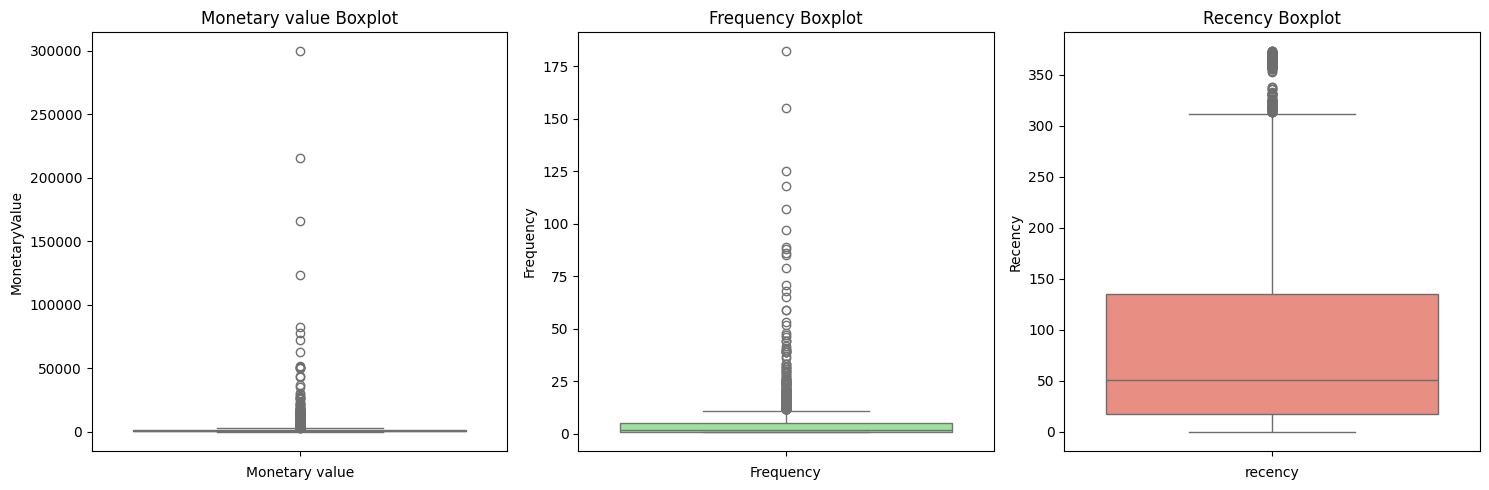

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary value Boxplot')
plt.xlabel('Monetary value')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('recency')


plt.tight_layout()
plt.show()

In [68]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 + M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 -1.5 *M_IQR)).copy()]
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,516.00,516.00,516.00,516,516.00
mean,15114.98,8928.51,15.16,2010-11-08 17:22:43.139534848,30.83
min,12357.00,2706.24,1.00,2009-12-10 18:03:00,0.00
25%,13592.25,3470.85,7.00,2010-11-04 12:20:15,4.00
50%,15003.50,4517.18,11.00,2010-11-25 11:03:30,14.00
75%,16673.50,7183.58,17.00,2010-12-05 13:56:00,35.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,364.00
std,1736.30,20138.49,17.79,NaN,48.07


In [70]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5*F_IQR))]
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.00,269.00,269.00,269,269.00
mean,15392.80,12298.98,23.70,2010-11-23 16:23:39.033456896,15.87
min,12437.00,898.14,12.00,2010-05-12 16:51:00,0.00
25%,13831.00,3638.01,13.00,2010-11-21 10:38:00,2.00
50%,15527.00,5572.67,17.00,2010-12-02 12:09:00,7.00
75%,16883.00,10269.46,24.00,2010-12-07 12:43:00,18.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,211.00
std,1748.38,27198.75,21.58,NaN,26.79


In [71]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index))& (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3698.00,3698.00,3698.00,3698,3698.00
mean,15380.44,721.60,2.77,2010-09-02 08:21:20.265008128,98.20
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13921.25,233.06,1.00,2010-07-06 10:47:00,22.00
50%,15391.50,492.59,2.00,2010-10-12 11:40:30,58.00
75%,16856.75,1061.68,4.00,2010-11-17 12:02:30,156.00
max,18287.00,2694.00,11.00,2010-12-09 20:01:00,373.00
std,1690.70,637.09,2.15,NaN,98.69


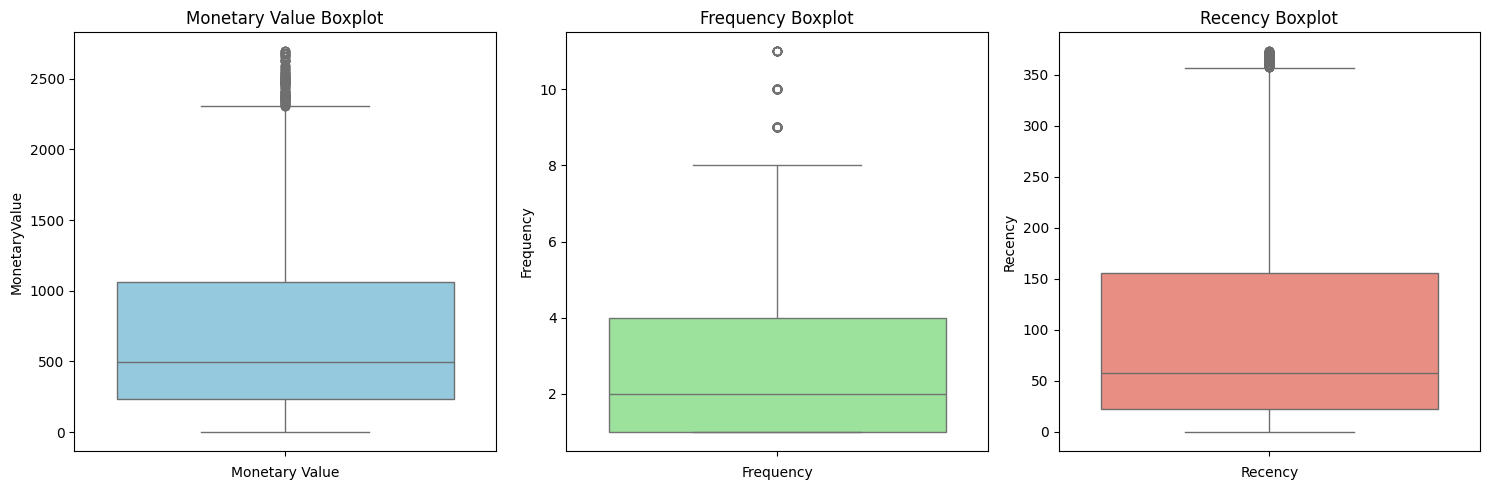

In [75]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'] , color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'] , color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'] , color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

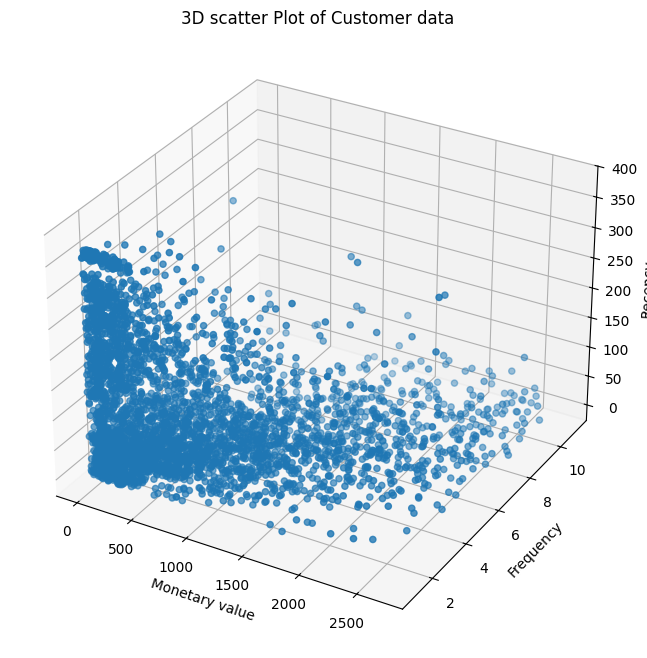

In [78]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter Plot of Customer data')

plt.show()

In [82]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.90671714, -0.35897879,  0.66679598],
       [ 0.38503064, -0.35897879, -0.97495693],
       [-0.78561922, -0.82509662, -0.25542325],
       ...,
       [-0.56593497, -0.82509662,  1.9943863 ],
       [ 0.3558786 , -0.35897879,  0.12967929],
       [ 1.2907062 ,  0.57325686, -0.82294277]])

In [83]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.91,-0.36,0.67
1,0.39,-0.36,-0.97
2,-0.79,-0.83,-0.26
3,1.92,-0.36,-0.57
4,-0.66,-0.83,-0.89
...,...,...,...
4243,-0.25,1.51,-0.82
4244,-0.52,-0.83,-0.33
4245,-0.57,-0.83,1.99
4246,0.36,-0.36,0.13


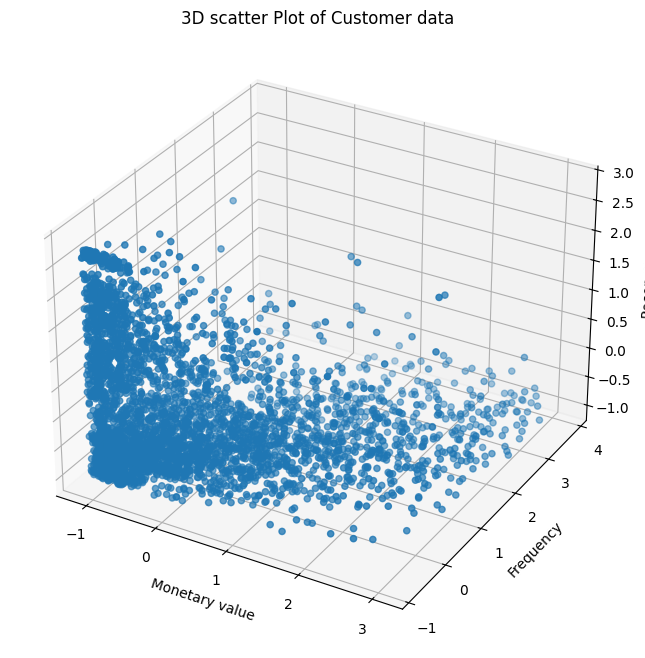

In [84]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter Plot of Customer data')

plt.show()

KMeans Clustering

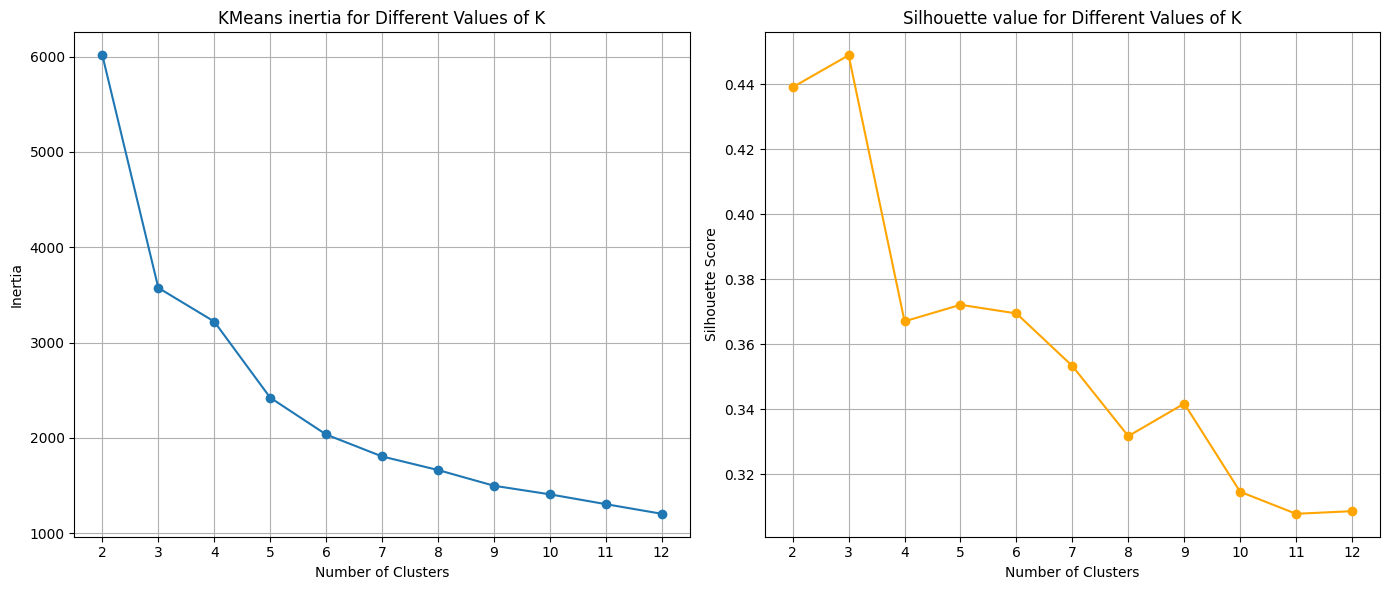

In [94]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k +1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans inertia for Different Values of K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette value for Different Values of K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [95]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 0, 0, ..., 2, 0, 1], dtype=int32)

In [96]:
non_outliers_df['Cluster'] = cluster_labels

non_outliers_df

C:\Users\Githma Manthinie\AppData\Local\Temp\ipykernel_10168\1791966522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,144.02,2,2010-06-28 13:53:00,164,3
1,12347.00,966.87,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4243,18283.00,563.19,6,2010-11-22 15:30:00,17,1
4244,18284.00,391.28,1,2010-10-04 11:33:00,66,0
4245,18285.00,361.10,1,2010-02-17 10:24:00,295,2
4246,18286.00,948.30,2,2010-08-20 11:57:00,111,0


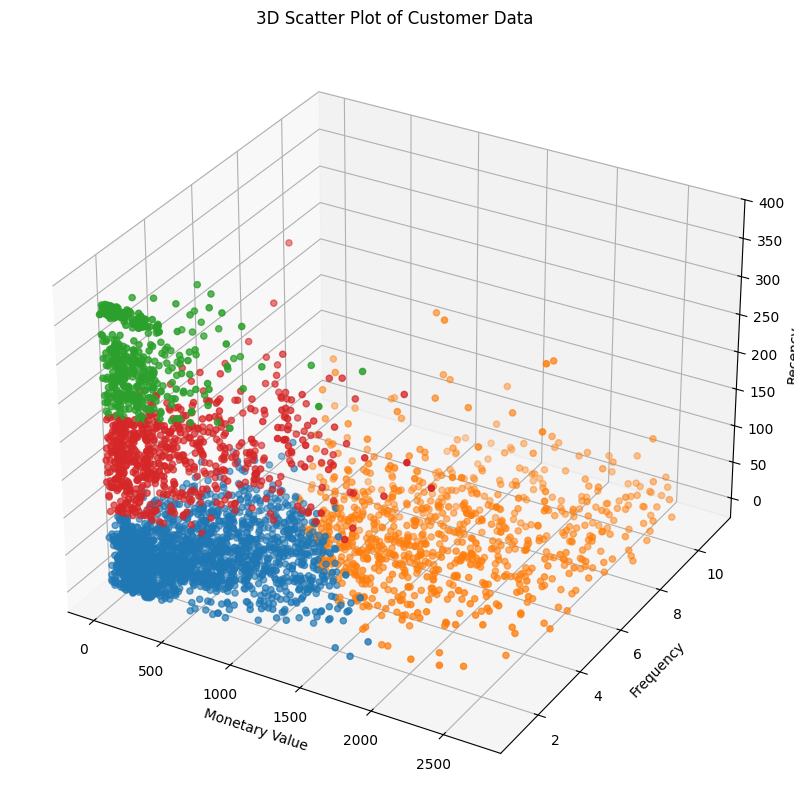

In [ ]:
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}


colors = non_outliers_df['Cluster'].map(cluster_colors)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

# Display the plot
plt.show()


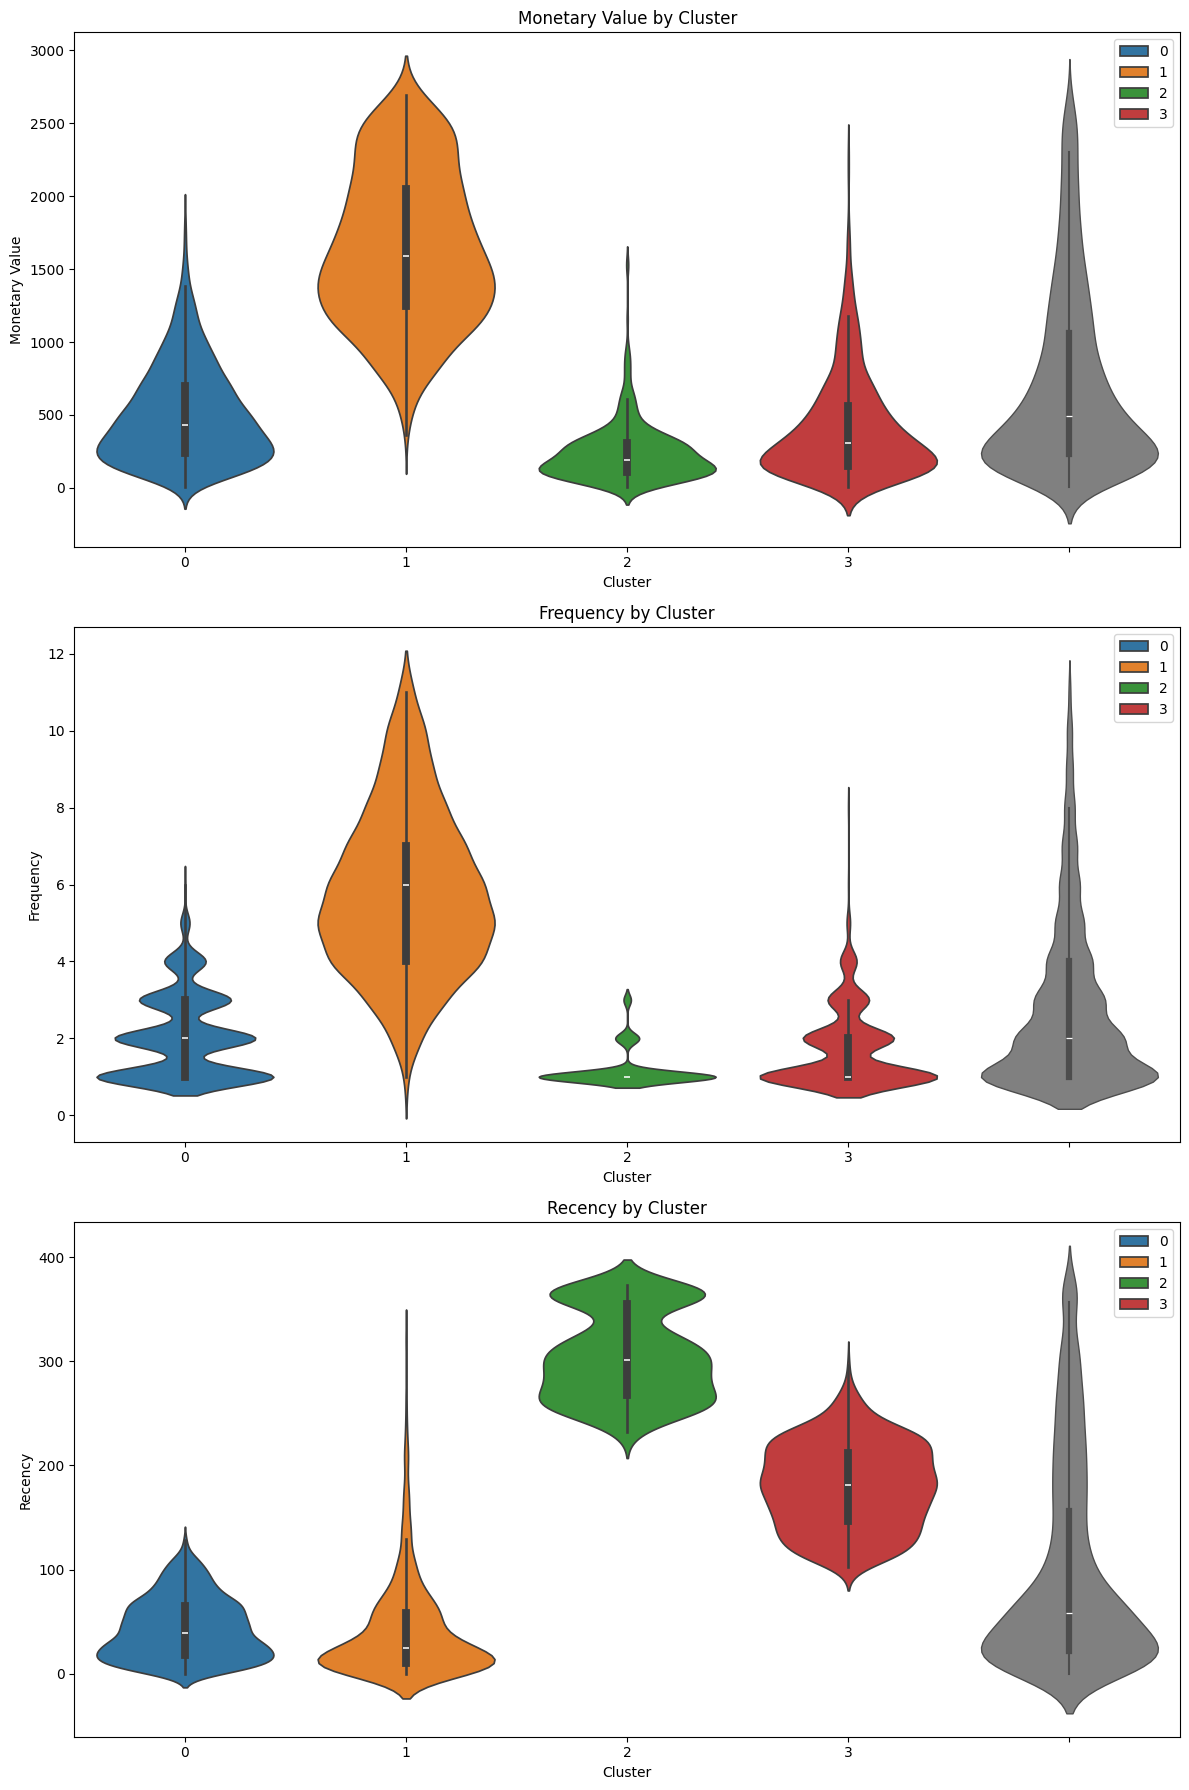

In [104]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors,  hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors,  hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


Cluster 0 (Blue): "Loyalty Maintenance" 
- Rationale: These are valuable customers who purchase consistently, though not always recently. The goal here is to reinforce their loyalty.
- Action: Strengthen engagement by introducing loyalty rewards, personalized offers, and frequent touchpoints to keep them engaged with your brand.

Cluster 1 (Orange): "Reactivate"
- Rationale: This group consists of lower-value customers who purchase infrequently and haven’t made recent transactions. Efforts should focus on reigniting their interest.
- Action: Deploy targeted marketing initiatives, special deals, or gentle reminders to encourage a return to active buying.

Cluster 2 (Green): "Develop" 
- Rationale: This group includes less active, low-value customers who have, however, made recent purchases. They might be new or require more attention to increase engagement.
- Action: Build rapport through attentive customer service, welcome incentives, and nurturing strategies to motivate higher spending and more frequent purchases.

Cluster 3 (Red): "Recognize & Reward"
- Rationale: These are your most frequent, high-value customers who remain highly engaged. Recognizing their contributions is essential to retain their loyalty.
- Action: Offer them exclusive rewards, a premier loyalty program, and personalized recognition to show appreciation for their ongoing loyalty and encourage sustained engagement.

Cluster Summary:
- Cluster 0 (Blue): Loyalty Maintenance
- Cluster 1 (Orange): Reactivate
- Cluster 2 (Green): Develop
- Cluster 3 (Red): Recognize & Reward

In [107]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] =-1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.00,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.00,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.00,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.00,3515.55,5,2010-12-09 12:05:00,0,-1
...,...,...,...,...,...,...
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3
4214,18245.00,3293.79,13,2010-11-25 16:52:00,14,-3


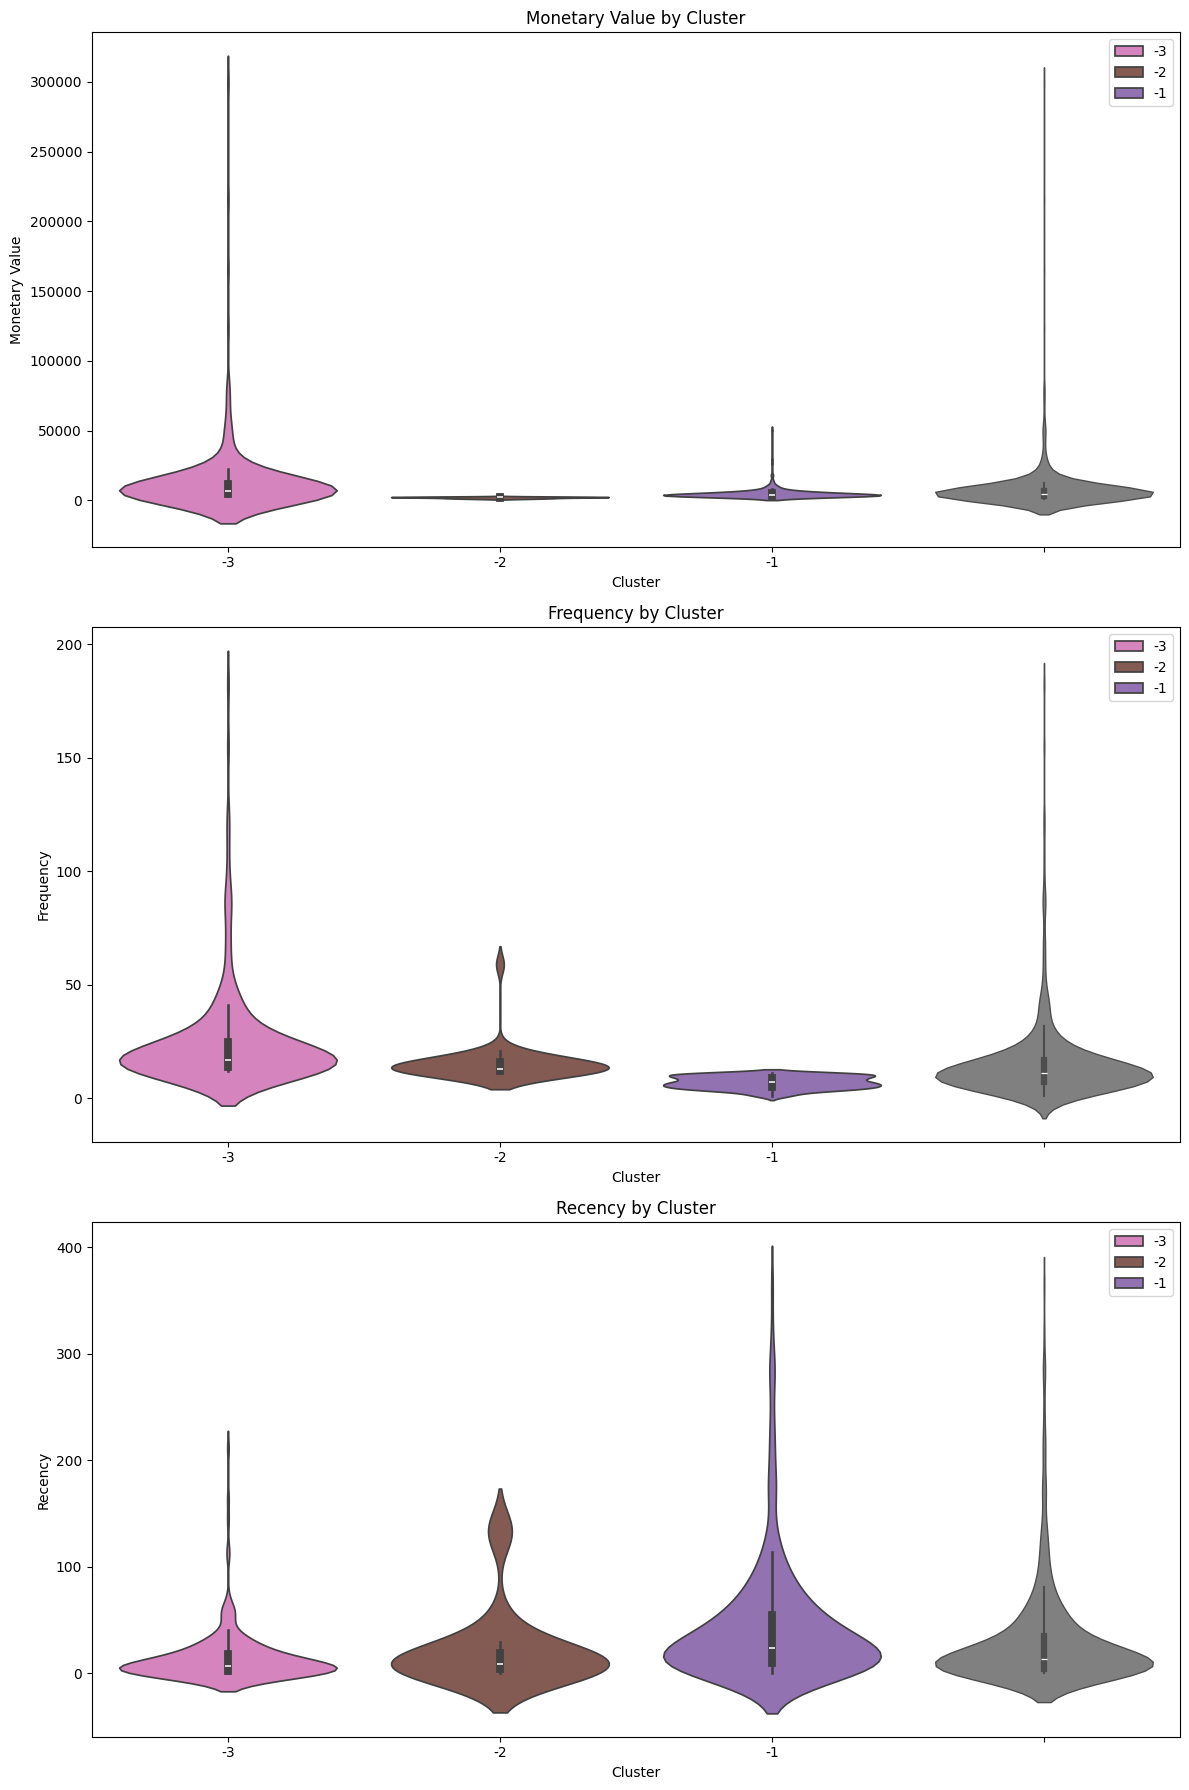

In [108]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster -1 (Monetary Outliers): "Indulge"

Characteristics: These are high spenders who make large purchases, though their buying frequency is lower. They contribute significantly in value, but their visits are spaced out.
Strategy: Focus on creating tailored luxury services or exclusive offers that match their high spending power to keep them engaged and loyal.

Cluster -2 (Frequency Outliers): "Upgrade"

Characteristics: These customers shop frequently, but their spending per purchase is relatively low. They’re highly engaged but represent smaller transactions.
Strategy: Encourage increased spending per visit by introducing loyalty programs, bundled deals, or premium offerings, capitalizing on their frequent engagement.


Cluster -3 (Monetary & Frequency Outliers): "Elevate"

Characteristics: This group represents the ultimate tier—customers who spend significantly and buy frequently, marking them as highly valuable.
Strategy: Show appreciation with VIP programs, exclusive offers, or special access to ensure continued loyalty and emphasize their importance to your business.







In [109]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [110]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,144.02,2,2010-06-28 13:53:00,164,3
1,12347.00,966.87,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3
4214,18245.00,3293.79,13,2010-11-25 16:52:00,14,-3


In [111]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,144.02,2,2010-06-28 13:53:00,164,3,REWARD
1,12347.00,966.87,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0,RETAIN
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1,RE-ENGAGE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0,RETAIN
...,...,...,...,...,...,...,...
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3,DELIGHT
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3,DELIGHT
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3,DELIGHT
4214,18245.00,3293.79,13,2010-11-25 16:52:00,14,-3,DELIGHT


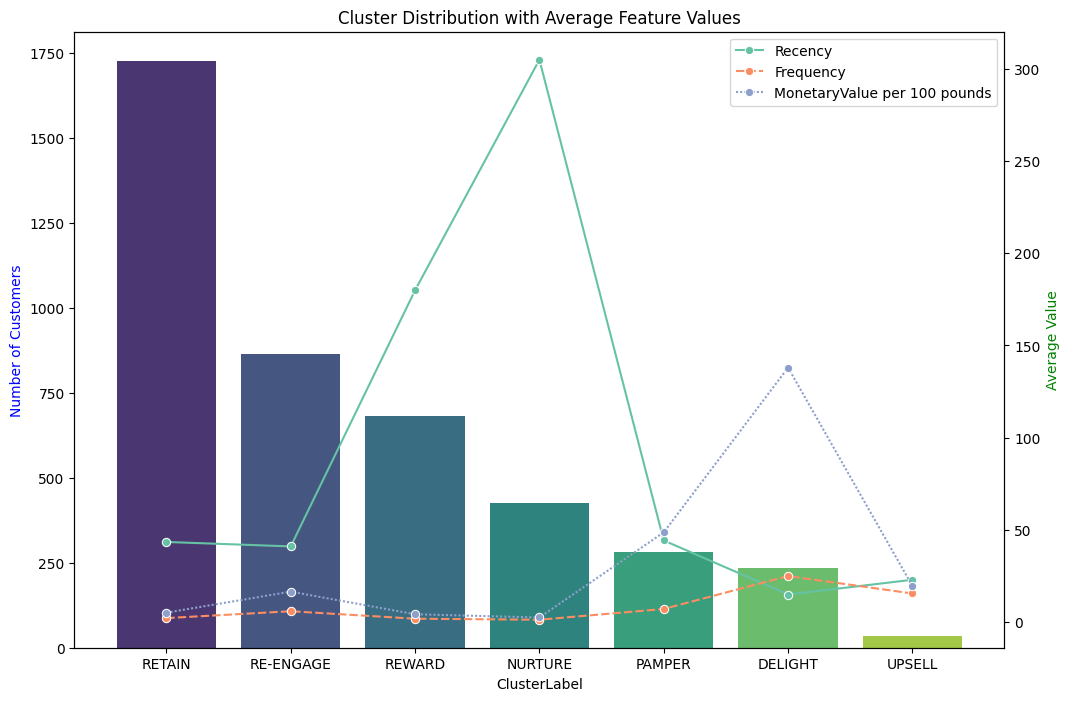

In [112]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()